# Exploratory Data Analysis of Nationwide Drug Seizures



### Introduction
This analysis examines nationwide drug seizures from fiscal year 2024, focusing on trends and patterns in drug types, weights, and event distributions.
The dataset provides insights into quantities of drugs seized and their geographical distribution across regions. The primary aim is to find significant relationships amongst variables such as drug type, weight, and location.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import numpy as np


plt.style.use('dark_background')
# Load the dataset
data = pd.read_csv('nationwide-drugs-fy21-fy24.csv')

# Data Cleaning
data.rename(columns={'Sum Qty (lbs)': 'Weight (lbs)'}, inplace=True)
# data.drop(columns=['FY'], inplace=True)
data['Land Filter'] = data['Land Filter'].str.strip().str.upper()

data.head()


,FY,Month (abbv),Component,Region,Land Filter,Area of Responsibility,Drug Type,Count of Event,Weight (lbs)
0,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Cocaine,1,19.224309
1,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Khat (Catha Edulis),2,4.416741
2,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Marijuana,12,161.359636
3,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Other Drugs**,4,6.020383
4,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,BALTIMORE FIELD OFFICE,Cocaine,2,9.237369


We renamed the column "Sum Qty (lbs)" to a more descriptive, and easy to understand name "Weight (lbs)". Along with it, we also dropped the FY column, as all of the values within it are 2024. We removed any possible whitestrips for Land Filter, and converted its characters to uppercase to make it ready to use for our EDA.

In [2]:

# Summary Statistics
summary_stats = data.describe()
summary_stats


,FY,Count of Event,Weight (lbs)
count,9866.000000,9866.000000,9866.000000
mean,2022.485100,26.052199,272.837338
std,1.126032,97.777970,1192.413999
min,2021.000000,1.000000,0.000000
25%,2021.000000,1.000000,0.117336
50%,2022.000000,5.000000,5.006103
75%,2024.000000,17.000000,81.681804
max,2024.000000,1925.000000,27884.986666


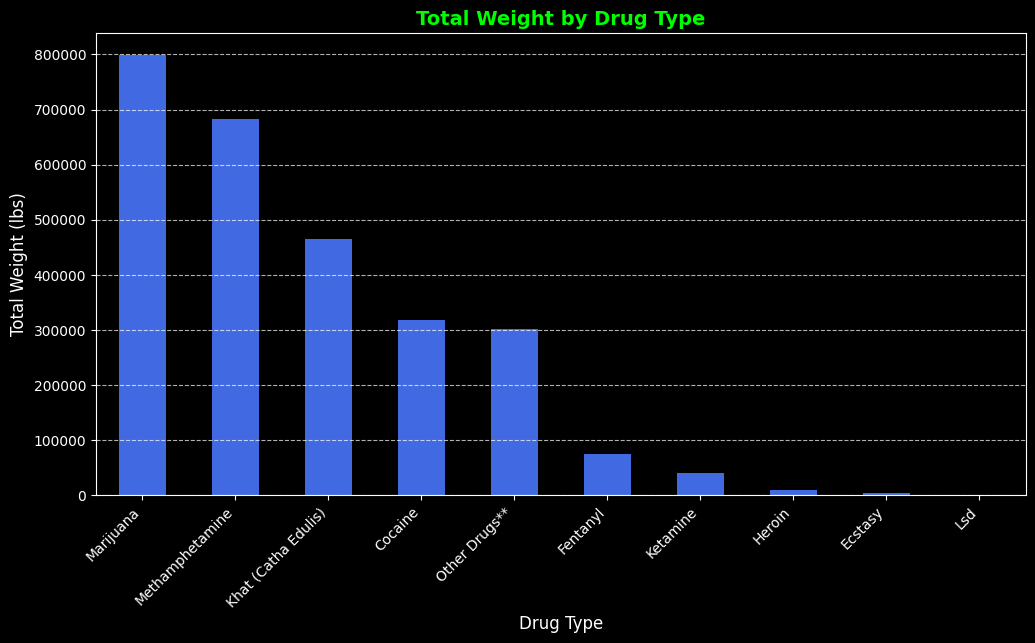

In [3]:

# Total Weight by Drug Type
total_weight_by_drug = data.groupby('Drug Type')['Weight (lbs)'].sum()

# Plotting
plt.figure(figsize=(12, 6))
total_weight_by_drug.sort_values(ascending=False).plot(kind='bar', color='royalblue')
plt.title('Total Weight by Drug Type', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Drug Type', fontsize=12)
plt.ylabel('Total Weight (lbs)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', alpha=0.0)
plt.show()


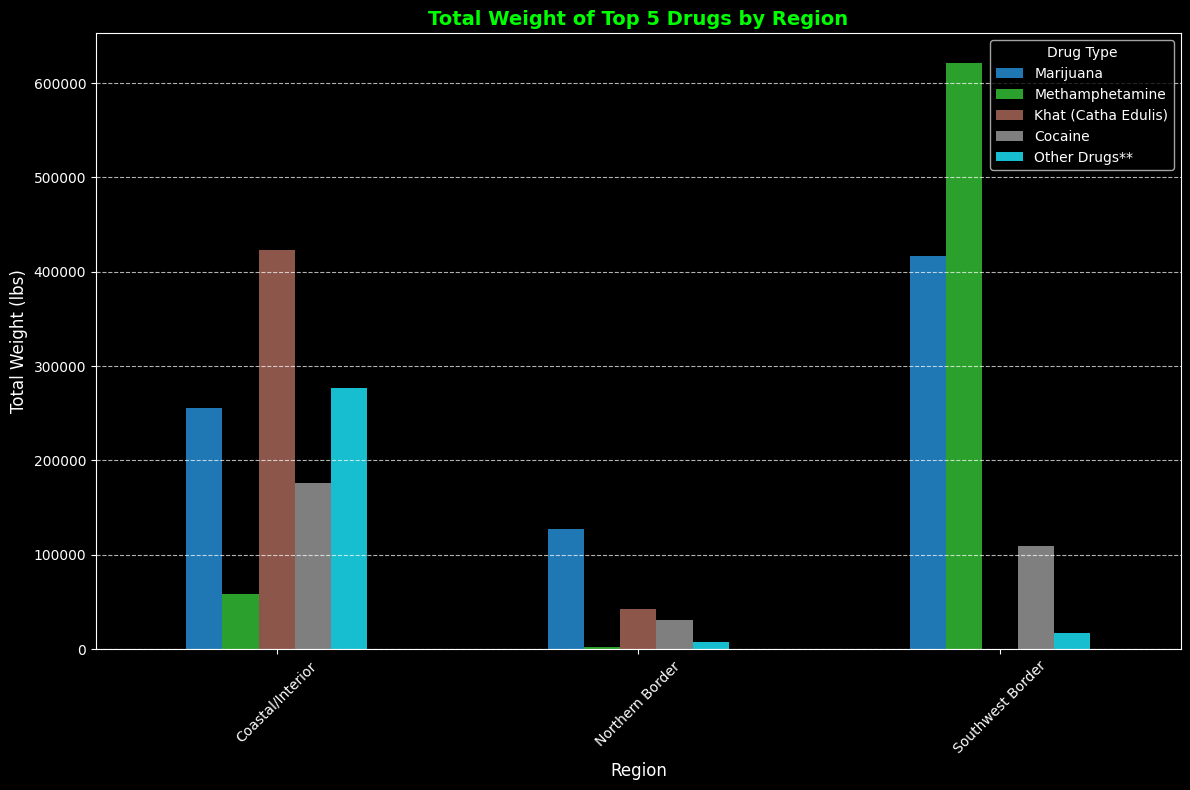

In [4]:

# Regional Trends for Top 5 Drugs
top_5_drugs = total_weight_by_drug.nlargest(5).index
region_drug_trends = data.groupby(['Region', 'Drug Type'])['Weight (lbs)'].sum().unstack()

region_drug_trends_top5 = region_drug_trends[top_5_drugs]

# Plotting
region_drug_trends_top5.plot(kind='bar', figsize=(14, 8), colormap='tab10')
plt.title('Total Weight of Top 5 Drugs by Region', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Weight (lbs)', fontsize=12)
plt.legend(title='Drug Type', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


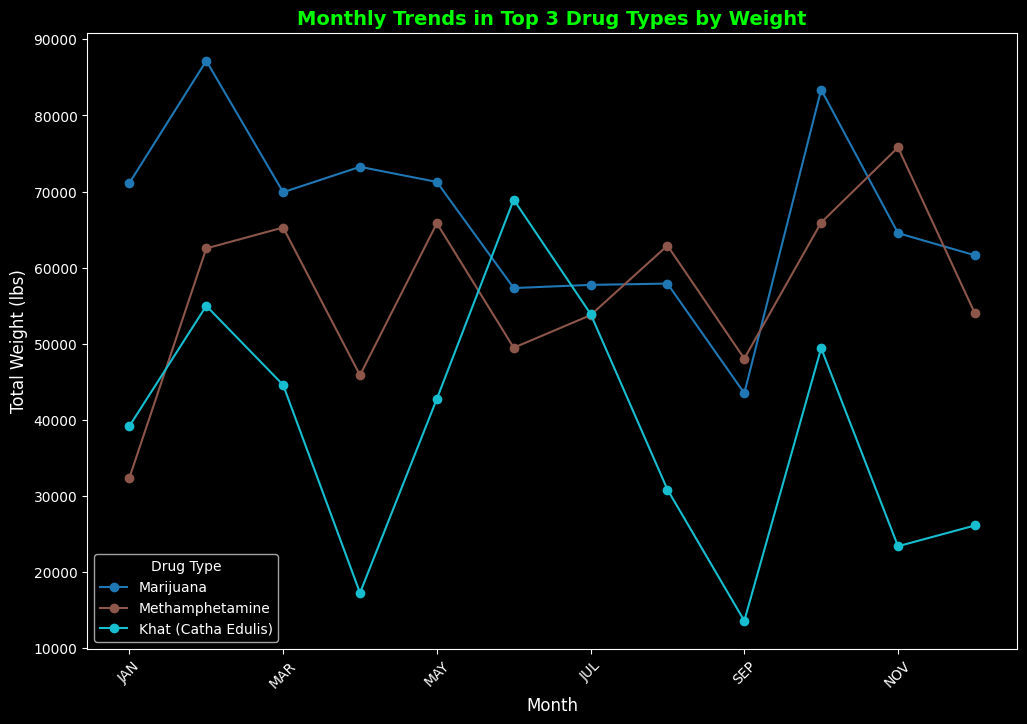

In [5]:

# Monthly Trends in Top 5 Drug Types by Weight

top_3_drugs = total_weight_by_drug.nlargest(3).index
region_drug_trends = data.groupby(['Region', 'Drug Type'])['Weight (lbs)'].sum().unstack()

month_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
drug_trends = data.groupby(['Month (abbv)', 'Drug Type'])['Weight (lbs)'].sum().unstack()
drug_trends = drug_trends.reindex(month_order)

# Plotting
drug_trends[top_3_drugs].plot(figsize=(12, 8), marker='o', colormap='tab10')
plt.title('Monthly Trends in Top 3 Drug Types by Weight', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Weight (lbs)', fontsize=12)
plt.legend(title='Drug Type', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.0)
plt.xticks(rotation=45)
plt.show()



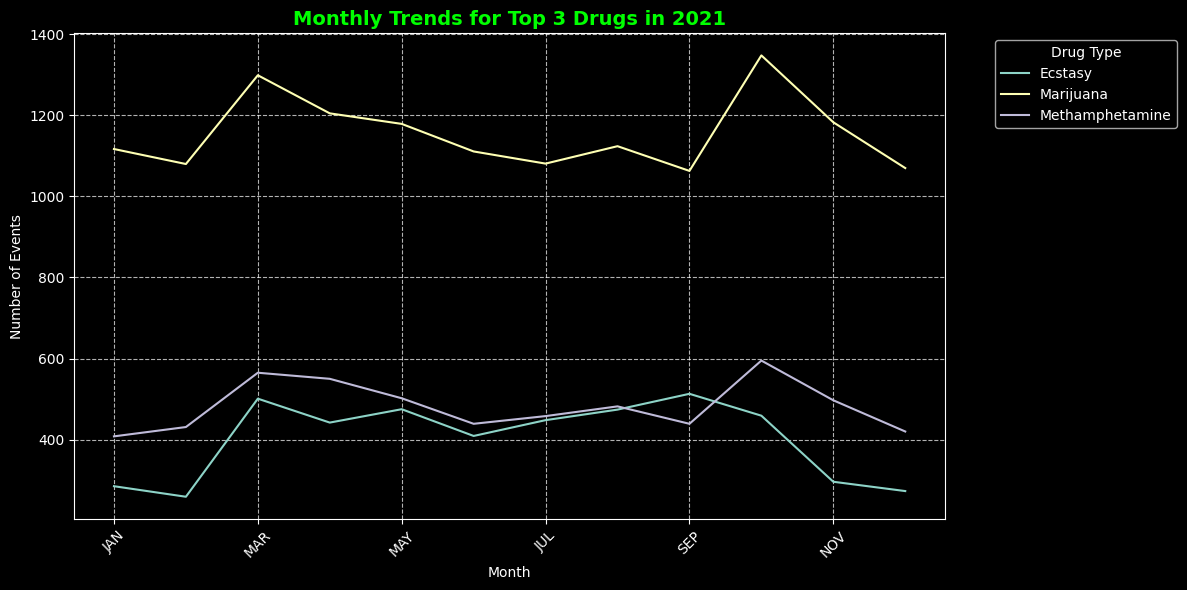

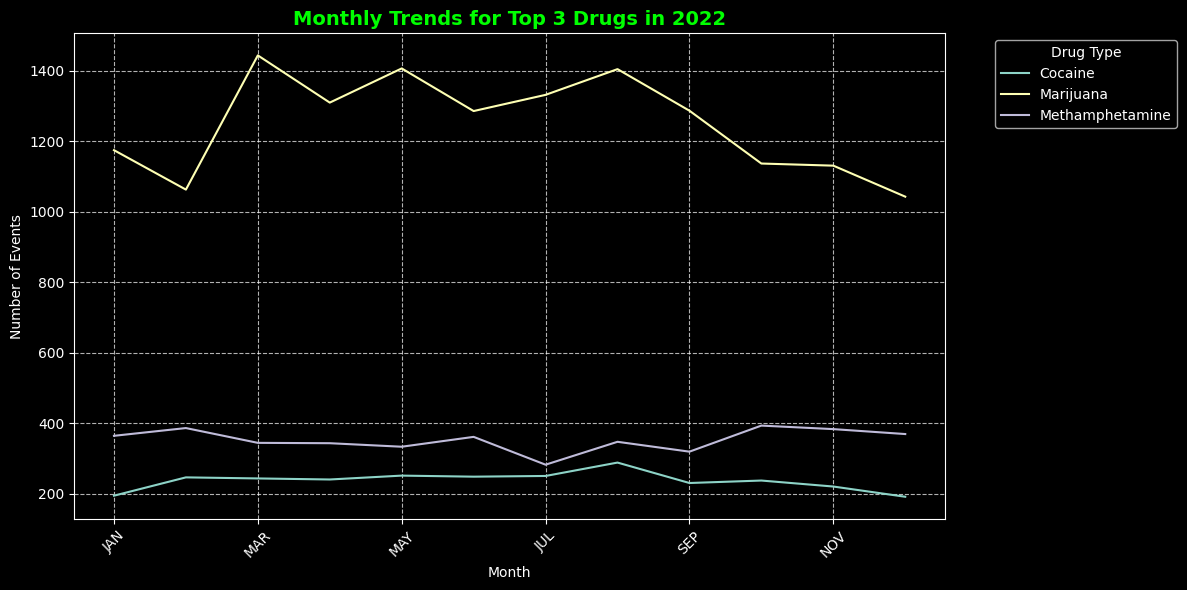

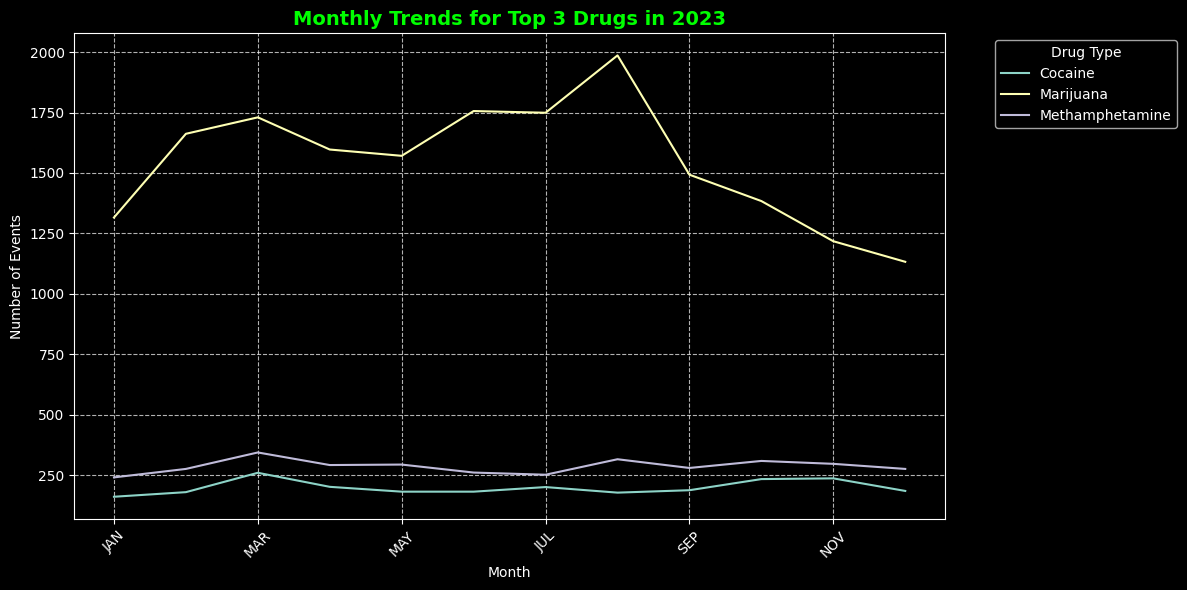

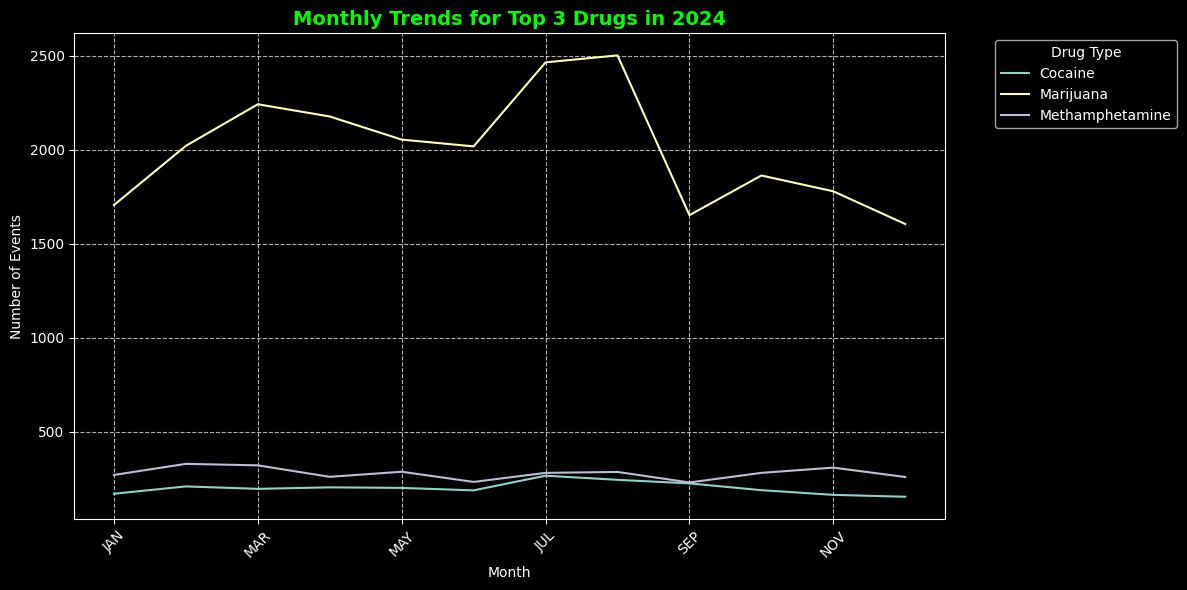

In [6]:
# Monthly Trends in Top 3 Drug Types by Events per year

filtered_data_no_other = data[data['Drug Type'] != 'Other Drugs**']
top_3_drugs_per_year = (
    filtered_data_no_other.groupby(['FY', 'Drug Type'])['Count of Event']
    .sum()
    .reset_index()
    .sort_values(by=['FY', 'Count of Event'], ascending=[True, False])
)

# Create a dictionary of top 3 drugs per year
top_3_per_year = (
    top_3_drugs_per_year.groupby('FY')['Drug Type']
    .apply(lambda x: x.head(3).tolist())
    .to_dict()
)

# Generate plots for each year
unique_years = sorted(filtered_data_no_other['FY'].unique())

for year in unique_years:
    # Filter data for the year and top 3 drugs
    year_top_3_drugs = top_3_per_year[year]
    year_data = filtered_data_no_other[
        (filtered_data_no_other['FY'] == year) & (filtered_data_no_other['Drug Type'].isin(year_top_3_drugs))
    ]

    # Aggregating monthly data for the top 3 drugs
    monthly_data = year_data.groupby(['Month (abbv)', 'Drug Type'])['Count of Event'].sum().reset_index()

    # Pivot data for plotting
    monthly_pivot = monthly_data.pivot_table(
        index='Month (abbv)', columns='Drug Type', values='Count of Event', fill_value=0
    )

    # Sorting months for proper order
    monthly_pivot = monthly_pivot.reindex(month_order)


    # Plotting the data
    monthly_pivot.plot(kind='line', figsize=(12, 6))
    plt.title(f'Monthly Trends for Top 3 Drugs in {year}', fontsize=14, fontweight='bold', color='lime')
    plt.xlabel('Month')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.show()


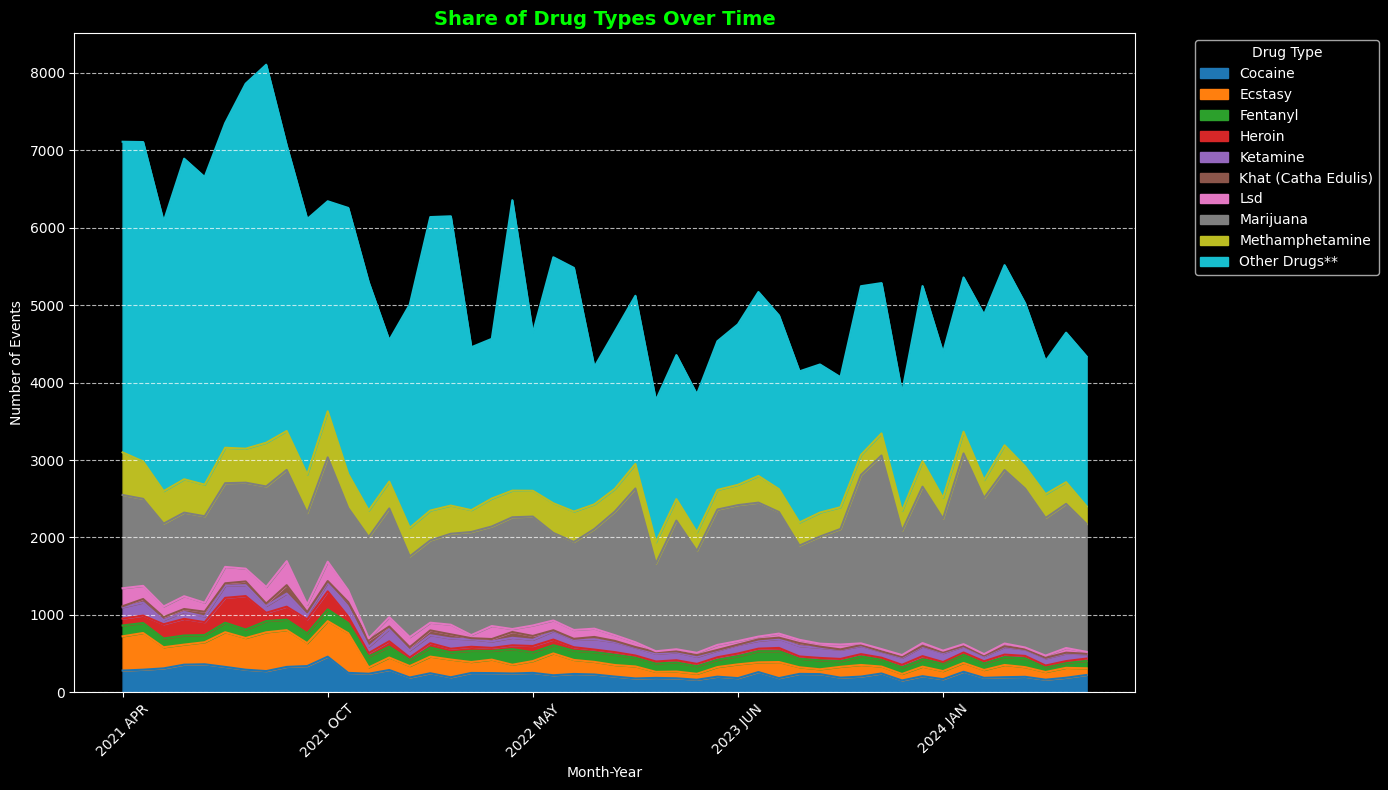

In [7]:
#Share of Each Drug Types over Time


#Preparing data
time_series = data.groupby(['FY', 'Month (abbv)', 'Drug Type'])[['Count of Event']].sum().reset_index()

area_chart_data = time_series.pivot_table(index=['FY', 'Month (abbv)'], columns='Drug Type', values='Count of Event', aggfunc='sum', fill_value=0).reset_index()

# Aggregating data for visualization
area_chart_data['Month-Year'] = area_chart_data['FY'].astype(str) + " " + area_chart_data['Month (abbv)']
area_chart_data = area_chart_data.drop(columns=['FY', 'Month (abbv)']).set_index('Month-Year')

# Stacked area chart
area_chart_data.plot(kind='area', figsize=(14, 8), stacked=True, colormap='tab10')
plt.title('Share of Drug Types Over Time', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Month-Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', alpha=0.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


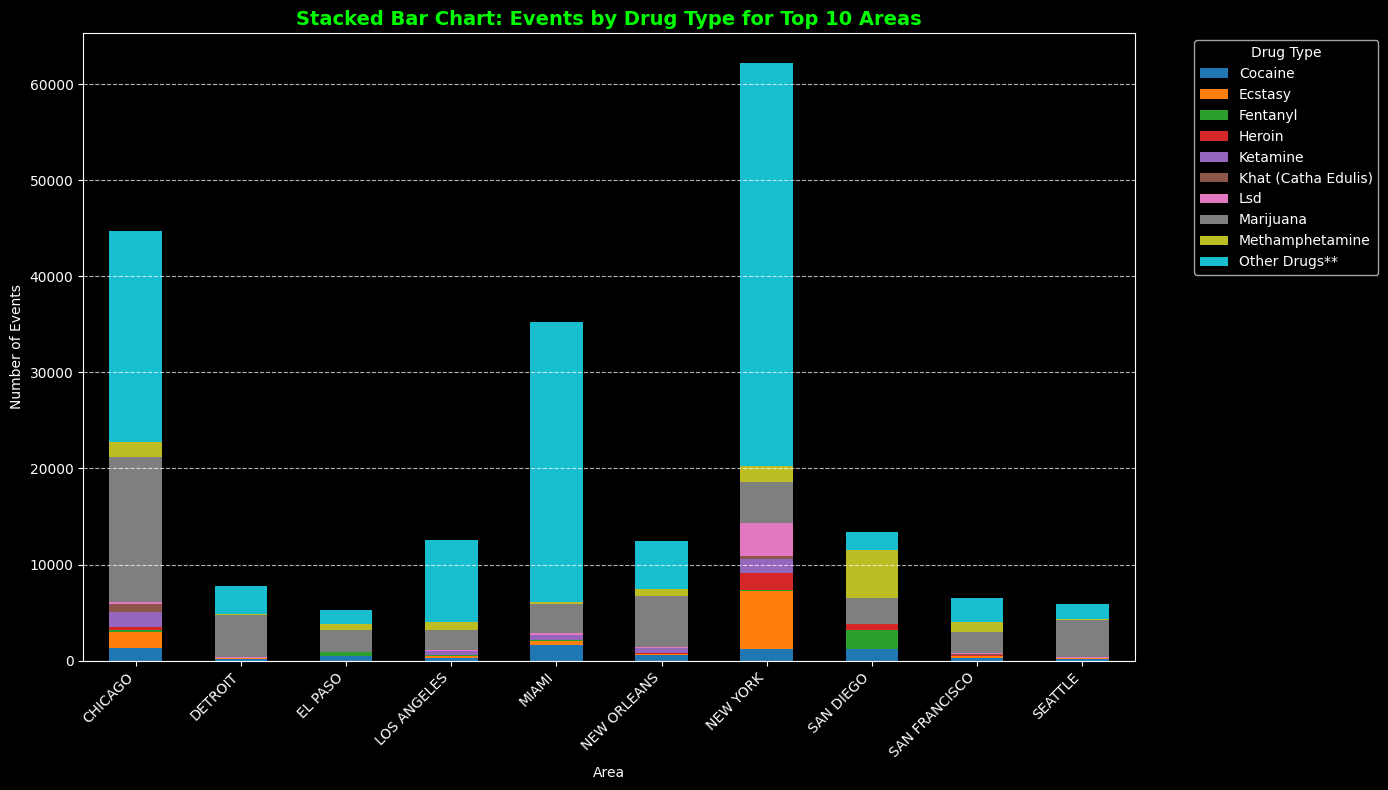

In [8]:
# Aggregating data for a treemap: Event counts by AOR and drug type
data['Area'] = data['Area of Responsibility'].str.replace(" FIELD OFFICE", "", regex=False)

treemap_data = data.groupby(['Area', 'Drug Type'])['Count of Event'].sum().reset_index()


# Constructing labels for the treemap
treemap_data['Label'] = (
    treemap_data['Area'] + "\n" + treemap_data['Drug Type'] + "\n" +
    treemap_data['Count of Event'].astype(str) + " events"
)

# Using a bar-based alternative to visualize hierarchical data since treemaps require `squarify`
top_aors = treemap_data.groupby('Area')['Count of Event'].sum().nlargest(10).index
top_aors_data = treemap_data[treemap_data['Area'].isin(top_aors)]

pivot_data = top_aors_data.pivot_table(
    index='Area', 
    columns='Drug Type', 
    values='Count of Event', 
    aggfunc='sum', 
    fill_value=0
)

# Visualizing the treemap using a bar chart alternative
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Stacked Bar Chart: Events by Drug Type for Top 10 Areas', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Area')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', alpha=0.0)
plt.show()


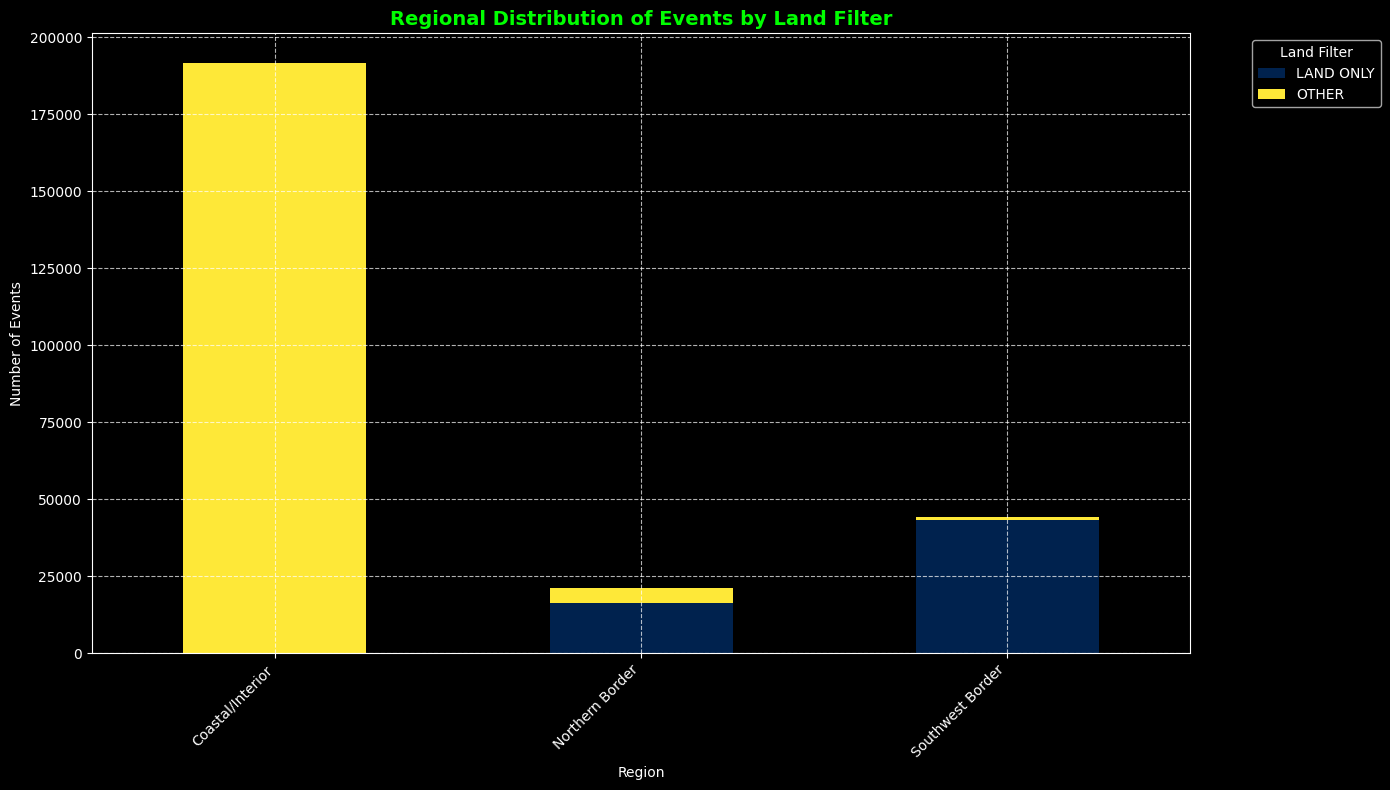

In [9]:
# Aggregating data for regional analysis with land filter
regional_land_filter = data.groupby(['Region', 'Land Filter'])['Count of Event'].sum().unstack(fill_value=0)

# Plotting a stacked bar chart for events by region and land filter
regional_land_filter.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='cividis')
plt.title('Regional Distribution of Events by Land Filter', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Region')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Land Filter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


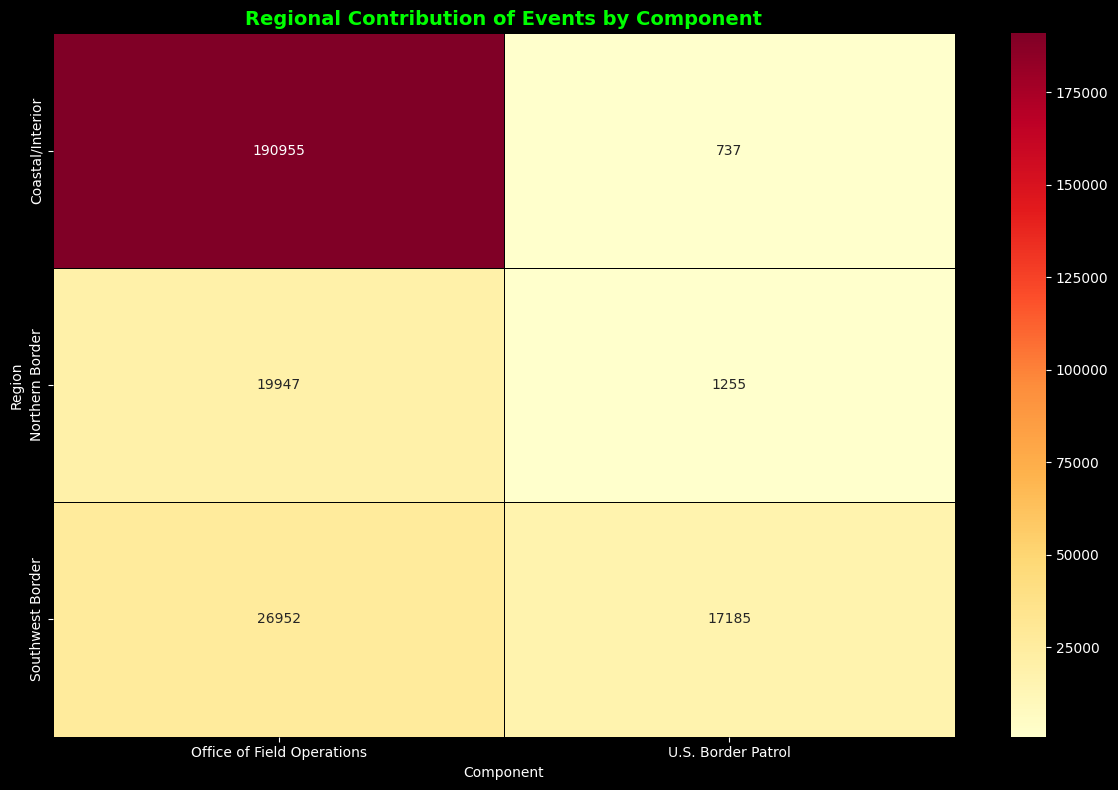

In [10]:
# Aggregating data for regional contribution by component
regional_component_data = data.groupby(['Region', 'Component'])['Count of Event'].sum().unstack(fill_value=0)

# Plotting a heatmap for regional contributions by component
plt.figure(figsize=(12, 8))
sns.heatmap(regional_component_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor='black')
plt.title('Regional Contribution of Events by Component', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Component')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


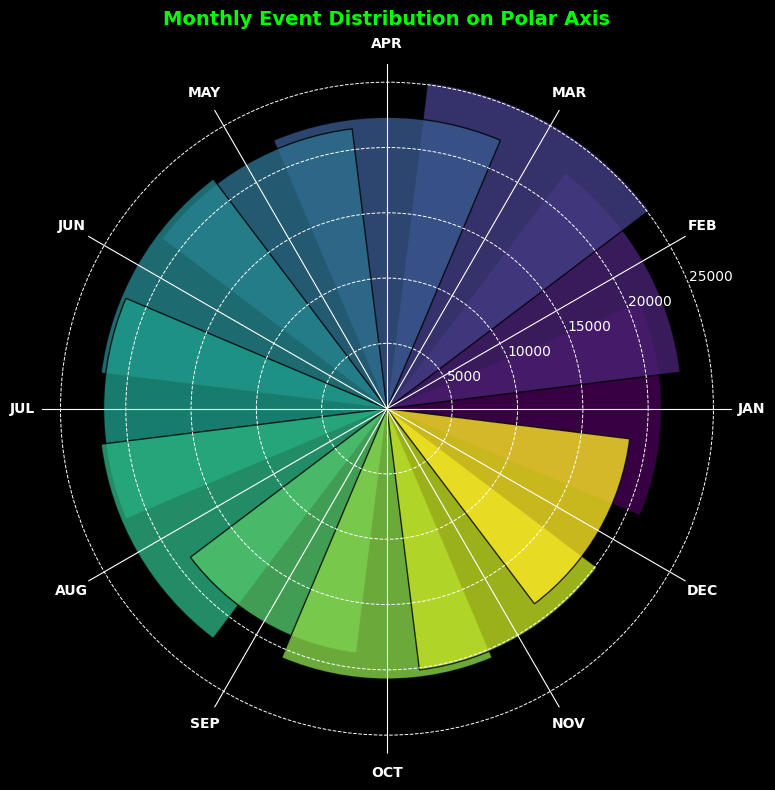

In [15]:
# Preparing data for a polar bar chart
monthly_events = data.groupby('Month (abbv)')['Count of Event'].sum().reindex(month_order)

# Converting month abbreviations to radians for polar plotting
angles = np.linspace(0, 2 * np.pi, len(month_order), endpoint=False).tolist()

# Plotting the bar chart on polar axis
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Creating bars with a gradient colormap
bars = ax.bar(
    angles, monthly_events, align='center', alpha=0.8, edgecolor="black",
    color=plt.cm.viridis(np.linspace(0, 1, len(month_order)))
)
# Enhancing aesthetics
ax.set_xticks(angles)
ax.set_xticklabels(month_order, fontsize=10, fontweight='bold')
ax.yaxis.grid(color='white', linestyle='--', linewidth=0.7)
ax.spines['polar'].set_visible(False)

# Adding a title and enhancing the layout
plt.title('Monthly Event Distribution on Polar Axis', va='bottom', fontsize=14, fontweight='bold', color='lime')
plt.tight_layout()
plt.show()

